In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tqdm
import re
from sklearn import preprocessing
import librosa
from util import convertEMF

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
palette = 'deep'
sns.set(font='SimHei', font_scale=1.2, palette=palette)  # 解决Seaborn中文显示问题

In [171]:

def loadFileHelper():
    df = None

    def loadFile(frame: pd.DataFrame) -> pd.DataFrame:
        nonlocal df
        if df is None:
            df = frame.copy()
            return df
        df = pd.concat([df, frame], axis=1)
        return df

    def final() -> pd.DataFrame:
        return df

    return loadFile, final

In [172]:

attachList = []
for dirI in range(1, 9):
    for root, _, files in os.walk(f'../3rd天府杯A提/附件{dirI}'):
        sorted_files = sorted(files, key=lambda x: int(os.path.splitext(x)[0]))
        attachList += [f'{os.path.join(root, i)}' for i in sorted_files]

attachList

['../3rd天府杯A提/附件1\\1.txt',
 '../3rd天府杯A提/附件1\\2.txt',
 '../3rd天府杯A提/附件1\\3.txt',
 '../3rd天府杯A提/附件1\\4.txt',
 '../3rd天府杯A提/附件1\\5.txt',
 '../3rd天府杯A提/附件1\\6.txt',
 '../3rd天府杯A提/附件1\\7.txt',
 '../3rd天府杯A提/附件1\\8.txt',
 '../3rd天府杯A提/附件1\\9.txt',
 '../3rd天府杯A提/附件1\\10.txt',
 '../3rd天府杯A提/附件1\\11.txt',
 '../3rd天府杯A提/附件1\\12.txt',
 '../3rd天府杯A提/附件1\\13.txt',
 '../3rd天府杯A提/附件1\\14.txt',
 '../3rd天府杯A提/附件1\\15.txt',
 '../3rd天府杯A提/附件1\\16.txt',
 '../3rd天府杯A提/附件1\\17.txt',
 '../3rd天府杯A提/附件1\\18.txt',
 '../3rd天府杯A提/附件1\\19.txt',
 '../3rd天府杯A提/附件1\\20.txt',
 '../3rd天府杯A提/附件2\\1.txt',
 '../3rd天府杯A提/附件2\\2.txt',
 '../3rd天府杯A提/附件2\\3.txt',
 '../3rd天府杯A提/附件2\\4.txt',
 '../3rd天府杯A提/附件2\\5.txt',
 '../3rd天府杯A提/附件2\\6.txt',
 '../3rd天府杯A提/附件2\\7.txt',
 '../3rd天府杯A提/附件2\\8.txt',
 '../3rd天府杯A提/附件2\\9.txt',
 '../3rd天府杯A提/附件2\\10.txt',
 '../3rd天府杯A提/附件2\\11.txt',
 '../3rd天府杯A提/附件2\\12.txt',
 '../3rd天府杯A提/附件2\\13.txt',
 '../3rd天府杯A提/附件2\\14.txt',
 '../3rd天府杯A提/附件2\\15.txt',
 '../3rd天府杯A提/附件2\\16.txt',
 '../3rd天府

In [173]:
helper, getFinalDf = loadFileHelper()

tqdmList = tqdm.tqdm(attachList)
for i in tqdmList:
    res = re.search(r'附件(\d+)\\(\d+)', i)
    header = '-'.join(res.groups())
    tqdmList.set_description(i, header)
    df = pd.read_table(i, sep=r'\n', header=None, engine='python')
    df.columns = [header]
    helper(df)

df = getFinalDf()
df

../3rd天府杯A提/附件8\30.txt: 100%|██████████| 170/170 [00:03<00:00, 50.27it/s]


,1-1,1-2,1-3,1-4,1-5,1-6,1-7,1-8,1-9,1-10,...,8-21,8-22,8-23,8-24,8-25,8-26,8-27,8-28,8-29,8-30
0,0.031847,0.016663,0.020103,0.005837,-0.011276,-0.025771,0.021692,0.009281,0.010529,0.001247,...,-9.679108,-2.319808,-18.703373,6.533483,20.799034,-53.410206,9.416552,11.053165,-5.428255,-11.606074
1,-0.011189,-0.002048,0.006537,0.023145,0.012113,-0.017351,0.010933,-0.003817,0.004915,-0.007641,...,-9.327146,-5.516180,-24.892555,-0.396517,5.738626,-61.589596,8.462877,15.089084,-4.420704,-10.087299
2,-0.019609,-0.007661,-0.002818,0.003030,0.021468,-0.009866,0.007658,-0.004752,0.003980,-0.002028,...,-7.958519,-7.522062,-28.146841,-7.194655,-9.456475,-69.321838,7.138796,17.843573,-2.655398,-9.089544
3,0.019685,0.007308,-0.002351,-0.019423,0.004160,-0.003318,0.005787,-0.018318,-0.022216,-0.028223,...,-5.693323,-8.335984,-28.462965,-13.267302,-23.552597,-75.982040,5.501653,19.054186,-0.385398,-8.460361
4,-0.020076,0.001226,-0.020594,0.016596,0.013048,-0.015948,-0.000294,-0.023931,0.003045,-0.024481,...,-2.737343,-8.099121,-26.189087,-18.153183,-35.564842,-81.187347,3.600021,18.593573,2.107255,-7.919340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-2.936200,1.122488,1.303684,-0.291669,-0.145528,0.035976,0.138636,-0.077726,0.077889,-0.176508,...,14.900795,34.438034,-22.248474,2.227601,55.010464,-41.308983,-25.541817,-9.548468,36.734196,58.555965
7996,-3.392283,2.000974,0.883152,-0.199985,0.457904,0.205311,0.186349,-0.010833,0.116246,-0.133005,...,7.446579,38.533329,-21.719902,6.016424,54.616383,-17.208982,-33.014061,-8.434589,43.017868,52.443722
7997,-2.868840,1.194994,0.248846,0.020338,0.813415,0.481300,0.176526,-0.000075,0.141039,-0.115230,...,1.258834,42.375584,-20.843985,9.369366,52.959850,7.429181,-39.193447,-7.400916,48.391541,46.517189
7998,-2.935732,-0.888954,-0.528132,0.284164,0.943457,0.712382,0.149862,-0.014108,0.181735,-0.082953,...,-3.315088,45.779606,-19.569902,12.115640,49.998829,30.841425,-43.725285,-6.257651,52.505825,40.839844


In [174]:
天然地震df = df.iloc[:, :-30]
人工爆破df = df.iloc[:, -30:]

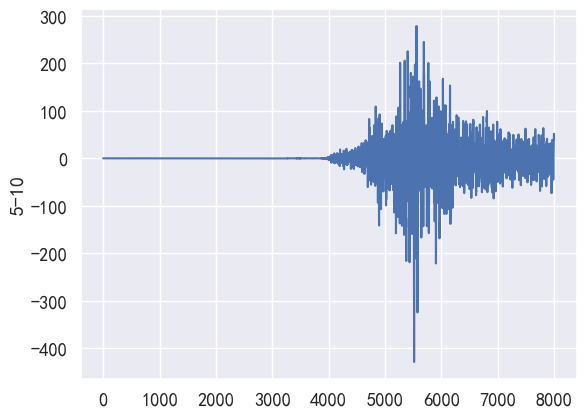

In [175]:
sns.lineplot(天然地震df['5-10'])
plt.show()

In [176]:
scaler = preprocessing.StandardScaler()
scaleDf = pd.DataFrame(scaler.fit_transform(天然地震df), columns=天然地震df.columns)
scaleDf

,1-1,1-2,1-3,1-4,1-5,1-6,1-7,1-8,1-9,1-10,...,7-11,7-12,7-13,7-14,7-15,7-16,7-17,7-18,7-19,7-20
0,0.012602,0.020437,0.011129,0.003667,-0.014223,-0.022791,0.050072,0.027789,0.023448,0.011450,...,-0.002500,0.003470,0.289135,0.187481,0.330270,0.035675,-0.552151,1.339394,0.000066,-0.003288
1,-0.003336,-0.003636,0.002875,0.017739,0.012110,-0.014807,0.024150,-0.015791,0.010223,-0.016240,...,-0.002313,0.002467,0.306159,0.209844,0.319814,-0.065131,-0.689923,1.176401,0.000066,0.007084
2,-0.006454,-0.010857,-0.002818,0.001385,0.022643,-0.007711,0.016258,-0.018904,0.008018,0.001249,...,-0.002313,0.000795,0.330749,0.232207,0.325042,-0.128135,-0.805267,0.944135,0.000066,-0.005881
3,0.008098,0.008401,-0.002534,-0.016870,0.003157,-0.001501,0.011751,-0.064041,-0.053703,-0.080366,...,-0.003060,0.002467,0.359122,0.261279,0.325042,-0.147036,-0.878960,0.691495,-0.001820,-0.003288
4,-0.006628,0.000577,-0.013635,0.012415,0.013163,-0.013477,-0.002902,-0.082718,0.005816,-0.068707,...,-0.001380,0.001798,0.389386,0.285879,0.288449,-0.131285,-0.875755,0.459231,-0.001820,0.004491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-1.086638,1.443121,0.792210,-0.238220,-0.165376,0.035756,0.331835,-0.261710,0.182159,-0.542362,...,-0.110555,0.201733,1.420272,0.757746,-1.551685,0.029374,-3.041664,-0.742846,-1.961323,-3.306823
7996,-1.255552,2.573326,0.536309,-0.163676,0.514021,0.196316,0.446796,-0.039138,0.272536,-0.406824,...,0.061885,0.246200,1.408922,0.780108,-1.462815,-0.093483,-2.859036,-0.473907,-1.672772,-2.863414
7997,-1.061691,1.536403,0.150323,0.015457,0.914286,0.458003,0.423128,-0.003340,0.330951,-0.351442,...,0.156690,0.432427,1.403248,0.797999,-1.394855,-0.279343,-2.570675,-0.204968,-1.395538,-2.181443
7998,-1.086465,-1.144672,-0.322481,0.229961,1.060699,0.677110,0.358884,-0.050033,0.426838,-0.250882,...,0.310281,0.592576,1.386224,0.815890,-1.350421,-0.512457,-2.253478,0.141392,-1.172995,-1.299809


In [177]:
sr = 200
mfccs = librosa.feature.mfcc(y=scaleDf['5-10'].values, sr=sr, n_mfcc=12)
mfcc_delta = librosa.feature.delta(mfccs)
mfcc_delta2 = librosa.feature.delta(mfcc_delta)
# 打印MFCC特征的形状
print("mfccs shape:", mfccs.shape)
print("mfcc_delta shape:", mfcc_delta.shape)
print("MFCC mfcc_delta2:", mfcc_delta2.shape)

mfccs shape: (12, 16)
mfcc_delta shape: (12, 16)
MFCC mfcc_delta2: (12, 16)


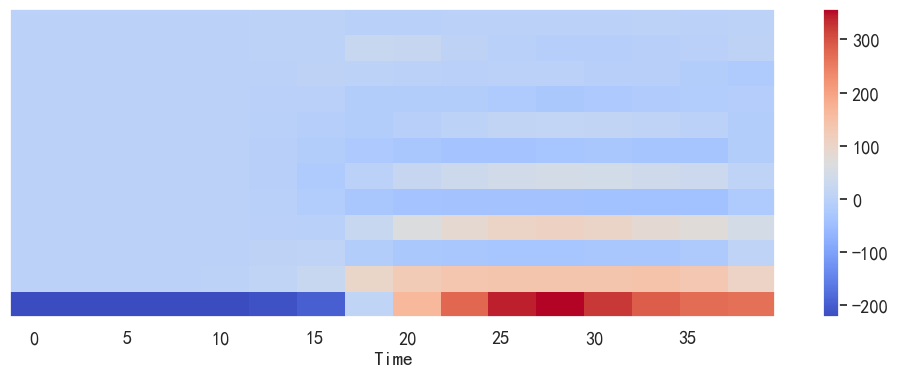

In [178]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=200, x_axis='time')
plt.colorbar()
plt.tight_layout()
convertEMF.exportEmf('.', 'MFCC图谱')
plt.show()

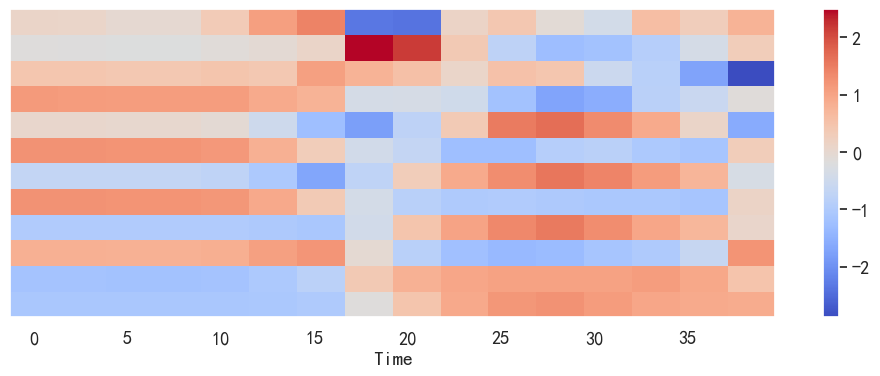

In [179]:
mfccsScale = preprocessing.scale(mfccs, axis=1)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccsScale, sr=sr, x_axis='time')
plt.colorbar()
plt.tight_layout()
convertEMF.exportEmf('.', 'MFCC图谱-标准化')
plt.show()

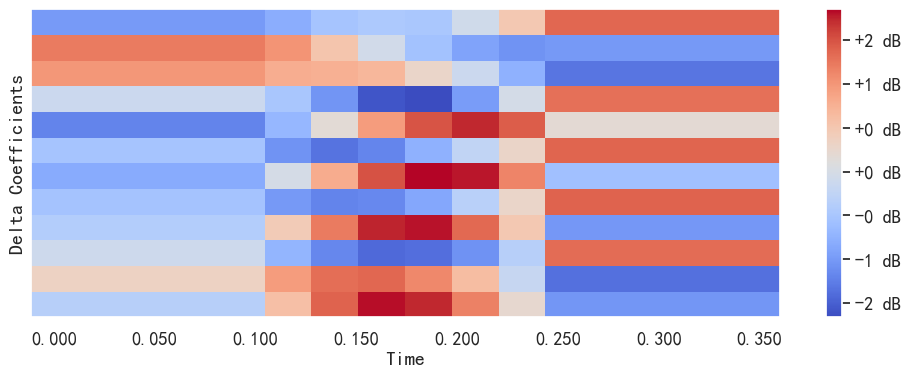

In [180]:
# 可视化显示一阶差分系数
plt.figure(figsize=(10, 4))
librosa.display.specshow(preprocessing.scale(mfcc_delta, axis=1), x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Delta Coefficients')
plt.tight_layout()
convertEMF.exportEmf('.', 'MFCC图谱-一阶差分-标准化')
plt.show()

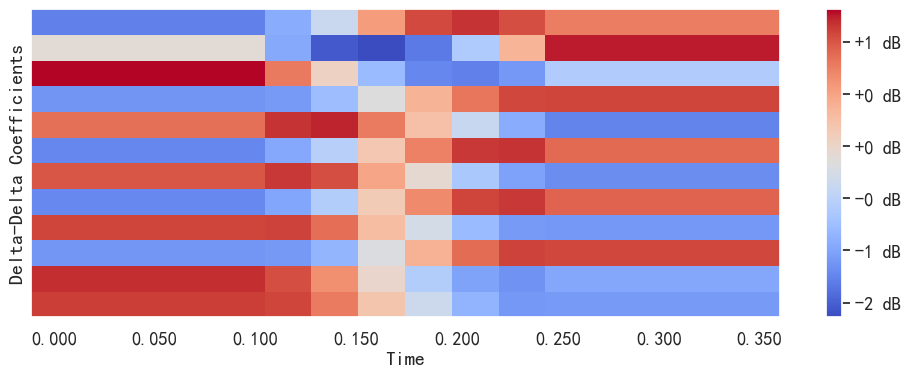

In [181]:
# 可视化显示二阶差分系数
plt.figure(figsize=(10, 4))
librosa.display.specshow(preprocessing.scale(mfcc_delta2, axis=1), x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Delta-Delta Coefficients')
plt.tight_layout()
convertEMF.exportEmf('.', 'MFCC图谱-二阶差分-标准化')
plt.show()

In [182]:
mfccs.T

array([[-2.22561106e+02,  6.57253208e-01,  6.57104734e-01,
         6.56857303e-01,  6.56510952e-01,  6.56065732e-01,
         6.55521712e-01,  6.54878972e-01,  6.54137610e-01,
         6.53297737e-01,  6.52359479e-01,  6.51322979e-01],
       [-2.22613982e+02,  5.82481800e-01,  5.82350217e-01,
         5.82130934e-01,  5.81823985e-01,  5.81429415e-01,
         5.80947284e-01,  5.80377665e-01,  5.79720642e-01,
         5.78976316e-01,  5.78144799e-01,  5.77226214e-01],
       [-2.22731122e+02,  4.16832451e-01,  4.16738289e-01,
         4.16581367e-01,  4.16361709e-01,  4.16079349e-01,
         4.15734330e-01,  4.15326702e-01,  4.14856527e-01,
         4.14323876e-01,  4.13728830e-01,  4.13071478e-01],
       [-2.22735430e+02,  4.10740276e-01,  4.10647489e-01,
         4.10492861e-01,  4.10276414e-01,  4.09998181e-01,
         4.09658204e-01,  4.09256533e-01,  4.08793230e-01,
         4.08268365e-01,  4.07682015e-01,  4.07034271e-01],
       [-2.21823707e+02,  1.48284561e+00,  9.1189102

In [183]:
mfccsScale

array([[-1.09645089, -1.09666515, -1.09713984, -1.09715729, -1.09346278,
        -1.06750504, -0.99553477, -0.16090983,  0.47036001,  0.92326385,
         1.19031599,  1.25194711,  1.11873031,  0.97231118,  0.89782739,
         0.88006974],
       [-1.18223808, -1.18343612, -1.18609027, -1.18618788, -1.16900984,
        -1.04963979, -0.81618673,  0.37865017,  0.80593519,  0.97252774,
         1.03899219,  1.02975782,  1.03172233,  1.09271156,  0.93995672,
         0.482535  ],
       [ 0.8258081 ,  0.82107656,  0.81059426,  0.81020874,  0.84193464,
         1.05601313,  1.19727484, -0.03901793, -0.85254676, -1.23867805,
        -1.36696701, -1.32075114, -1.13405173, -1.00334299, -0.63355097,
         1.2259963 ],
       [-0.98214848, -0.98389162, -0.98775338, -0.98789541, -0.99288077,
        -1.02351395, -1.08055328, -0.43729339,  0.47067616,  1.01641946,
         1.37916715,  1.54436185,  1.3159188 ,  0.96429358,  0.7181564 ,
         0.06693689],
       [ 1.24274777,  1.23870988,  1

In [184]:
preprocessing.minmax_scale(mfccs.T, axis=0)

array([[3.00711037e-04, 1.73320804e-03, 8.45663765e-01, 3.74887552e-02,
        1.00000000e+00, 3.10112185e-01, 1.00000000e+00, 5.34945090e-01,
        1.00000000e+00, 8.44308201e-01, 2.95338302e-01, 6.56206107e-01],
       [2.09500456e-04, 1.20749767e-03, 8.43839003e-01, 3.68246806e-02,
        9.98303394e-01, 3.08976647e-01, 9.98090283e-01, 5.32262036e-01,
        9.97198897e-01, 8.41334194e-01, 2.93099602e-01, 6.45984166e-01],
       [7.43159535e-06, 4.28334822e-05, 8.39796407e-01, 3.53534830e-02,
        9.94544715e-01, 3.06460963e-01, 9.93859477e-01, 5.26317973e-01,
        9.90993304e-01, 8.34745547e-01, 2.88139964e-01, 6.23338375e-01],
       [0.00000000e+00, 0.00000000e+00, 8.39647730e-01, 3.52993760e-02,
        9.94406480e-01, 3.06368442e-01, 9.93703878e-01, 5.26099365e-01,
        9.90765077e-01, 8.34503233e-01, 2.87957560e-01, 6.22505518e-01],
       [1.57273339e-03, 7.53786655e-03, 8.51883113e-01, 3.34001319e-02,
        9.75784698e-01, 2.89336104e-01, 9.67021751e-01, 5.02

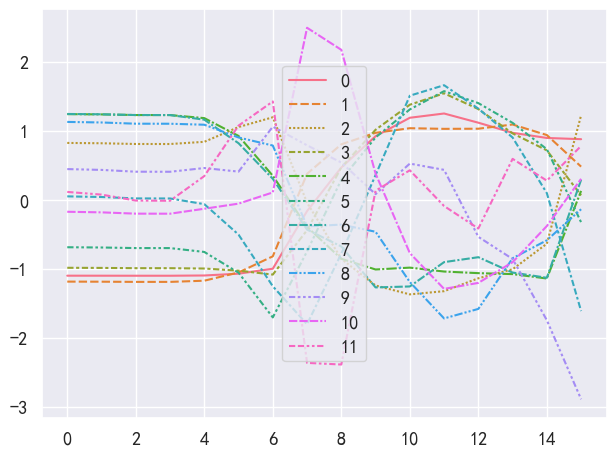

In [185]:
sns.lineplot(preprocessing.scale(mfccs.T, axis=0))
plt.tight_layout()
plt.show()

In [186]:
mfcc_delta

array([[ 3.82808476e+01,  3.82808476e+01,  3.82808476e+01,
         3.82808476e+01,  3.82808476e+01,  6.06770105e+01,
         7.91552604e+01,  8.92314321e+01,  8.74538829e+01,
         7.42295899e+01,  5.18172716e+01,  2.25095281e+01,
         2.25095281e+01,  2.25095281e+01,  2.25095281e+01,
         2.25095281e+01],
       [ 1.40584849e+01,  1.40584849e+01,  1.40584849e+01,
         1.40584849e+01,  1.40584849e+01,  1.88091607e+01,
         2.15887827e+01,  2.20044313e+01,  2.01228434e+01,
         1.62773115e+01,  1.00644215e+01,  1.09292920e+00,
         1.09292920e+00,  1.09292920e+00,  1.09292920e+00,
         1.09292920e+00],
       [-2.17885001e+00, -2.17885001e+00, -2.17885001e+00,
        -2.17885001e+00, -2.17885001e+00, -3.83697971e+00,
        -5.09284288e+00, -5.73767349e+00, -5.62513944e+00,
        -4.82119989e+00, -2.86001216e+00,  1.69067930e+00,
         1.69067930e+00,  1.69067930e+00,  1.69067930e+00,
         1.69067930e+00],
       [ 5.16560635e+00,  5.16560635e

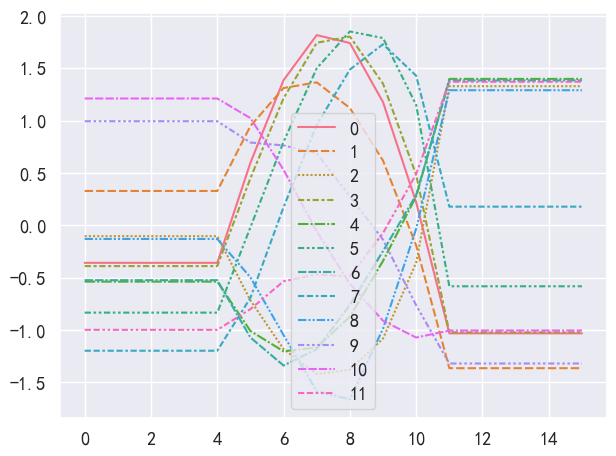

In [187]:
sns.lineplot(preprocessing.scale(mfcc_delta.T, axis=0))
plt.tight_layout()
plt.show()

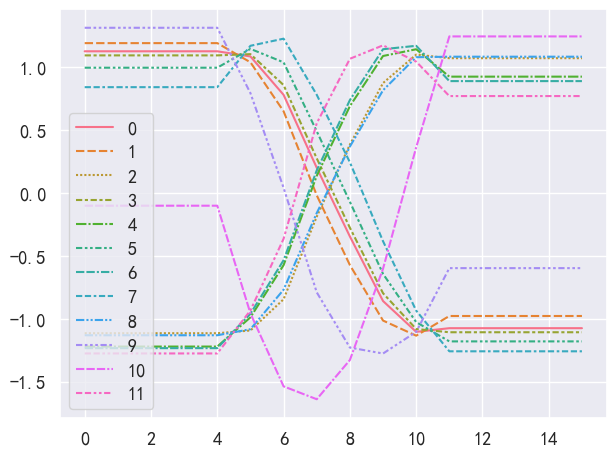

In [188]:
sns.lineplot(preprocessing.scale(mfcc_delta2.T, axis=0))
plt.tight_layout()
plt.show()

In [189]:
np.asarray([mfccs[0], mfcc_delta[0], mfcc_delta2[0]])

array([[-2.22561106e+02, -2.22613982e+02, -2.22731122e+02,
        -2.22735430e+02, -2.21823707e+02, -2.15417920e+02,
        -1.97657268e+02,  8.30946607e+00,  1.64092717e+02,
         2.75859238e+02,  3.41761724e+02,  3.56970902e+02,
         3.24095982e+02,  2.87963021e+02,  2.69582091e+02,
         2.65199900e+02],
       [ 3.82808476e+01,  3.82808476e+01,  3.82808476e+01,
         3.82808476e+01,  3.82808476e+01,  6.06770105e+01,
         7.91552604e+01,  8.92314321e+01,  8.74538829e+01,
         7.42295899e+01,  5.18172716e+01,  2.25095281e+01,
         2.25095281e+01,  2.25095281e+01,  2.25095281e+01,
         2.25095281e+01],
       [ 7.56148138e+00,  7.56148138e+00,  7.56148138e+00,
         7.56148138e+00,  7.56148138e+00,  7.23482761e+00,
         4.81487358e+00,  2.15462918e-01, -4.12109242e+00,
        -8.19479243e+00, -1.01392902e+01, -9.90780913e+00,
        -9.90780913e+00, -9.90780913e+00, -9.90780913e+00,
        -9.90780913e+00]])

In [200]:
第一维mfcc信号可视化 = pd.DataFrame(np.asarray([mfccs[0], mfcc_delta[0], mfcc_delta2[0]]).T,
                                    columns=['MFCC系数', '一阶差分系数', '二阶差分系数'])
第一维mfcc信号可视化

,MFCC系数,一阶差分系数,二阶差分系数
0,-222.561106,38.280848,7.561481
1,-222.613982,38.280848,7.561481
2,-222.731122,38.280848,7.561481
3,-222.735430,38.280848,7.561481
4,-221.823707,38.280848,7.561481
5,-215.417920,60.677010,7.234828
6,-197.657268,79.155260,4.814874
7,8.309466,89.231432,0.215463
8,164.092717,87.453883,-4.121092
9,275.859238,74.229590,-8.194792


In [205]:
第一维mfcc信号可视化 = pd.DataFrame(preprocessing.scale(第一维mfcc信号可视化, axis=0),
                                    columns=第一维mfcc信号可视化.columns)
第一维mfcc信号可视化

,MFCC系数,一阶差分系数,二阶差分系数
0,-1.096451,-0.357521,1.124614
1,-1.096665,-0.357521,1.124614
2,-1.097140,-0.357521,1.124614
3,-1.097157,-0.357521,1.124614
4,-1.093463,-0.357521,1.124614
5,-1.067505,0.598387,1.083483
6,-0.995535,1.387072,0.778777
7,-0.160910,1.817141,0.199645
8,0.470360,1.741272,-0.346389
9,0.923264,1.176835,-0.859326


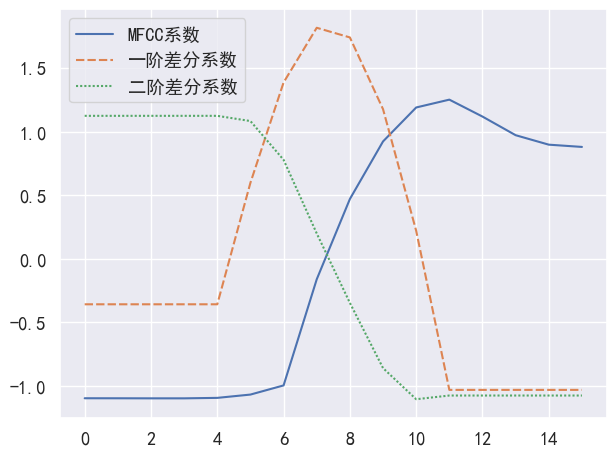

In [207]:
# sns.lineplot(第一维mfcc信号可视化)
sns.lineplot(第一维mfcc信号可视化)
plt.tight_layout()
convertEMF.exportEmf('.', '第一维mfcc信号可视化')
plt.show()

In [192]:
from scipy.stats import *


def 计算样本熵(mfccs):
    # 假设您已经计算得到MFCC系数 mfcc
    mfccsT = mfccs.T
    # 计算样本熵
    sample_entropy = np.zeros(mfccsT.shape[1])

    for i in range(mfccsT.shape[1]):
        data = mfccsT[:, i]
        data_nonnegative = data - np.min(data) + 1e-10
        sample_entropy[i] = entropy(data_nonnegative)

    # 打印样本熵值
    return sample_entropy


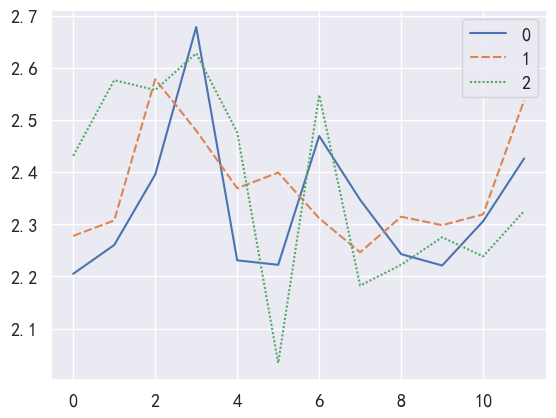

In [193]:
sns.lineplot(np.hstack((计算样本熵(mfccs), 计算样本熵(mfcc_delta), 计算样本熵(mfcc_delta2))).reshape(12, 3))
plt.show()

In [194]:
np.hstack((计算样本熵(mfccs), 计算样本熵(mfcc_delta), 计算样本熵(mfcc_delta2))).reshape(12, 3)

array([[2.20506593, 2.27779079, 2.43144938],
       [2.26029828, 2.30730204, 2.57648667],
       [2.39541485, 2.57815352, 2.5575713 ],
       [2.67845272, 2.47970333, 2.62790125],
       [2.23084392, 2.36919228, 2.4764652 ],
       [2.22226865, 2.39923157, 2.03392384],
       [2.46933909, 2.31158289, 2.54834842],
       [2.3469251 , 2.24634433, 2.18244043],
       [2.24272985, 2.31451586, 2.22239194],
       [2.22096936, 2.29830956, 2.27514005],
       [2.30593624, 2.31914264, 2.23843233],
       [2.42633489, 2.53771498, 2.3255384 ]])

In [195]:
计算样本熵(mfccs)

array([2.20506593, 2.27779079, 2.43144938, 2.26029828, 2.30730204,
       2.57648667, 2.39541485, 2.57815352, 2.5575713 , 2.67845272,
       2.47970333, 2.62790125])

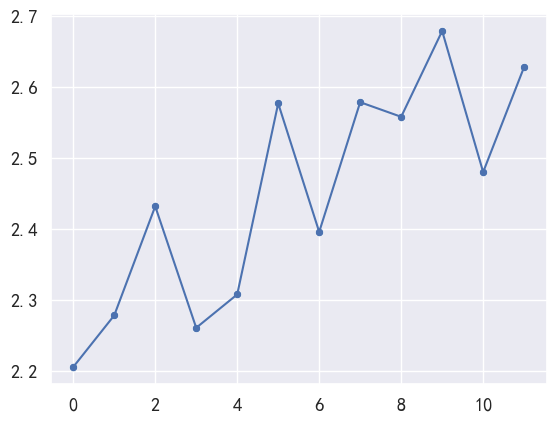

In [196]:
sns.scatterplot(计算样本熵(mfccs))
sns.lineplot(计算样本熵(mfccs))
plt.show()

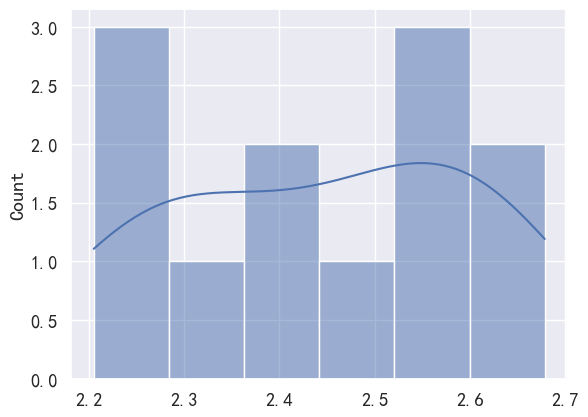

In [197]:
sns.histplot(计算样本熵(mfccs), kde=True, bins=6)
plt.show()

D:\Users\win\AppData\Local\Temp\ipykernel_11136\3031603683.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(计算样本熵(mfccs), fit=norm, kde=True, bins=6)


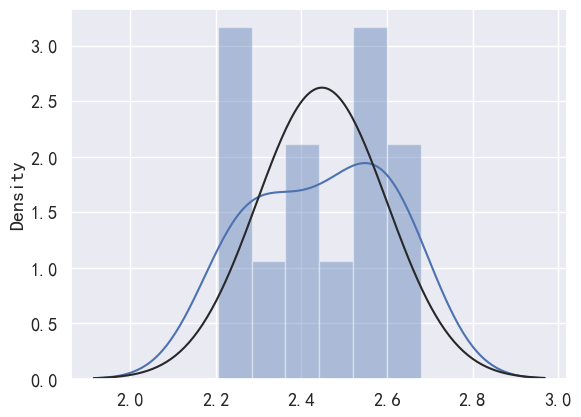

In [198]:
sns.distplot(计算样本熵(mfccs), fit=norm, kde=True, bins=6)
plt.show()